In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lal
from pycbc.types.timeseries import TimeSeries
from pycbc import frame
from pycbc.psd import welch
from tqdm import tqdm

### 1. Optimal subtraction results.

In [5]:
snr_threshold = 7
injection_optimal_snr_median_CE = np.loadtxt("./injection_opt_snr_10Hz_bns_CE_medianR0nospin.txt", unpack=True)
print(injection_optimal_snr_median_CE)

[ 0.85000709  5.07202697  8.03836802  4.82353176 42.5545347  10.5864913
  4.62665525  4.22247697 24.02978872 20.67673377 11.30847489  5.68631045
 20.1487925   2.25129204  6.77129894  3.22767614  5.69402328 14.2783629
 13.03940685  1.85511872  2.95960778  4.69179793  4.49553202  8.86905767
 12.13857894  0.90008488  8.19201933  0.90047396  4.41831987 15.31004152
  7.81366558  7.84631343  3.30334326  5.78741231  4.78094996  4.91865121
  6.35028491  2.82198494 11.66753489  1.72905969  6.38519027  7.47169241
  5.76044838  6.5624306   7.57455112  1.44133762  6.34942266  7.31152752
  9.39481229  4.38873215 15.66456466  4.39385914  7.46730772  4.39738096
 10.25650551  3.15839172  7.59605885 15.29072652  8.61165846 10.7422589
  1.48727231  4.7267083   6.62161195 14.13483145  1.29711145 11.399095
  4.88725713  4.37895099  4.3646608   4.65623254 10.67286291  3.26120317
  0.75724696  9.86366287  8.06736201  3.36521389  2.3618622  11.5948503
  3.69449365  6.22585103  3.73897664  8.57589372  7.40120

In [10]:
path_bns_CE_median_params = "/mnt/d/project_data/psd_3g/data/CE/bns_median_CE_norotation_6h/injection_params.txt"
bns_CE_median_params = np.loadtxt(path_bns_CE_median_params, unpack=True, skiprows=1)
path_bns_CE_median_params_below7 = "bns_CE_median_params_below7.txt"
bns_CE_median_params_below7 = open(path_bns_CE_median_params_below7, 'w')
bns_CE_median_params_below7.write(
    """# coa_time mass1 mass2 spin1x spin1y spin1z spin2x spin2y spin2z distance coa_phase inclination ra dec polarization\n""")

for i in tqdm(range(len(injection_optimal_snr_median_CE))):
    if injection_optimal_snr_median_CE[i] < snr_threshold:
        bns_CE_median_params_below7.write(
            """%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\n""" % 
                (bns_CE_median_params[0][i], bns_CE_median_params[1][i], bns_CE_median_params[2][i], 
                    0, 0, bns_CE_median_params[5][i], 0, 0, bns_CE_median_params[8][i],
                    bns_CE_median_params[9][i], bns_CE_median_params[10][i], bns_CE_median_params[11][i],
                    bns_CE_median_params[12][i], bns_CE_median_params[13][i], bns_CE_median_params[14][i]))
bns_CE_median_params_below7.close()

100%|██████████| 682/682 [00:00<00:00, 162151.54it/s]


In [6]:
snr_threshold = 7
injection_optimal_snr_upper_CE = np.loadtxt("./injection_opt_snr_10Hz_bns_CE_upperR0nospin.txt", unpack=True)
print(injection_optimal_snr_upper_CE)

[1.90827344 6.48535831 4.32071529 ... 7.87484843 4.06285861 8.05742426]


In [12]:
path_bns_CE_upper_params = "/mnt/d/project_data/psd_3g/data/CE/bns_upper_CE_norotation_6h/injection_params.txt"
bns_CE_upper_params = np.loadtxt(path_bns_CE_upper_params, unpack=True, skiprows=1)
path_bns_CE_upper_params_below7 = "bns_CE_upper_params_below7.txt"
bns_CE_upper_params_below7 = open(path_bns_CE_upper_params_below7, 'w')
bns_CE_upper_params_below7.write(
    """# coa_time mass1 mass2 spin1x spin1y spin1z spin2x spin2y spin2z distance coa_phase inclination ra dec polarization\n""")

for i in tqdm(range(len(injection_optimal_snr_upper_CE))):
    if injection_optimal_snr_upper_CE[i] < snr_threshold:
        bns_CE_upper_params_below7.write(
            """%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\n""" % 
                (bns_CE_upper_params[0][i], bns_CE_upper_params[1][i], bns_CE_upper_params[2][i], 
                    0, 0, bns_CE_upper_params[5][i], 0, 0, bns_CE_upper_params[8][i],
                    bns_CE_upper_params[9][i], bns_CE_upper_params[10][i], bns_CE_upper_params[11][i],
                    bns_CE_upper_params[12][i], bns_CE_upper_params[13][i], bns_CE_upper_params[14][i]))
bns_CE_upper_params_below7.close()

100%|██████████| 5190/5190 [00:00<00:00, 211042.86it/s]


In [5]:
# median local merger rate

path_subtraction_CE_medianR0_snr7p0_optimal = "/mnt/d/project_data/psd_3g/subtraction/bns_median_CE_norotation_6h_optimalsub_7/confusion_noise_CE_1_BNS_21600s.gwf"
path_det_CE_noise = "/mnt/d/project_data/psd_3g/data/CE/CE_6h/det_noise_CE_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_snr7p0_optimal = []

for i in tqdm(range(int((21600-3600)/stride))):
    medianR0_snr7p0_optimal = frame.read_frame(location=path_subtraction_CE_medianR0_snr7p0_optimal, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_CE_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Optimal subtraction.
    total_noise_snr7p0_optimal = det_noise.data + medianR0_snr7p0_optimal.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise_snr7p0_optimal = TimeSeries(total_noise_snr7p0_optimal, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr7p0_optimal = welch(total_noise_snr7p0_optimal.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    psd_list_snr7p0_optimal.append(estimated_psd_total_noise_snr7p0_optimal.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_snr7p0_optimal = np.array(psd_list_snr7p0_optimal)

# save psd_list_snr7p0_optimal
print(psd_list_snr7p0_optimal)
print(np.shape(psd_list_snr7p0_optimal))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0_optimal.sample_frequencies).T}
for i in range(len(psd_list_snr7p0_optimal)):
    name_keys['psd_%s' % i] = psd_list_snr7p0_optimal[i]
snr7p0_optimal_CE_median_psd_file = pd.DataFrame(name_keys)
snr7p0_optimal_CE_median_psd_file.to_csv("./psd_snr7p0_optimal_CE_median_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:03:12<01:51, 111.54s/it]


[[3.51997375e-59 7.06605166e-59 7.14459460e-59 ... 3.18769532e-49
  3.70899602e-49 7.31978411e-50]
 [3.03065117e-59 6.10174052e-59 6.22348617e-59 ... 5.43713001e-49
  5.25651989e-49 1.56880651e-49]
 [2.23088046e-59 4.47096766e-59 4.49865710e-59 ... 4.82431993e-49
  6.23772474e-49 1.21965924e-49]
 ...
 [2.28100498e-59 4.57595589e-59 4.61793357e-59 ... 6.23438624e-49
  4.91909761e-49 9.38393727e-50]
 [2.79601232e-59 5.62424815e-59 5.83391889e-59 ... 4.86577956e-49
  4.58061121e-49 2.06200964e-49]
 [1.62023581e-59 3.24824095e-59 3.36533098e-59 ... 5.67958027e-49
  5.78309061e-49 1.68095505e-49]]
(35, 32769)


In [3]:
# upper local merger rate

path_subtraction_CE_upperR0_snr7p0_optimal = "/mnt/d/project_data/psd_3g/subtraction/bns_upper_CE_norotation_6h_optimalsub_7/confusion_noise_CE_1_BNS_21600s.gwf"
path_det_CE_noise = "/mnt/d/project_data/psd_3g/data/CE/CE_6h/det_noise_CE_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_snr7p0_optimal = []

for i in tqdm(range(int((21600-3600)/stride))):
    upperR0_snr7p0_optimal = frame.read_frame(location=path_subtraction_CE_upperR0_snr7p0_optimal, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_CE_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Optimal subtraction.
    total_noise_snr7p0_optimal = det_noise.data + upperR0_snr7p0_optimal.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise_snr7p0_optimal = TimeSeries(total_noise_snr7p0_optimal, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr7p0_optimal = welch(total_noise_snr7p0_optimal.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    psd_list_snr7p0_optimal.append(estimated_psd_total_noise_snr7p0_optimal.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_snr7p0_optimal = np.array(psd_list_snr7p0_optimal)

# save psd_list_snr7p0_optimal
print(psd_list_snr7p0_optimal)
print(np.shape(psd_list_snr7p0_optimal))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0_optimal.sample_frequencies).T}
for i in range(len(psd_list_snr7p0_optimal)):
    name_keys['psd_%s' % i] = psd_list_snr7p0_optimal[i]
snr7p0_optimal_CE_upper_psd_file = pd.DataFrame(name_keys)
snr7p0_optimal_CE_upper_psd_file.to_csv("./psd_snr7p0_optimal_CE_upper_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:03:00<01:51, 111.20s/it]


[[3.63816001e-59 7.28864415e-59 7.32727438e-59 ... 3.18769627e-49
  3.70812106e-49 7.31046215e-50]
 [3.02866106e-59 6.29802224e-59 6.10074860e-59 ... 5.43648957e-49
  5.25672512e-49 1.56862823e-49]
 [2.64762323e-59 5.34514797e-59 5.44990868e-59 ... 4.82463046e-49
  6.23731734e-49 1.21997424e-49]
 ...
 [1.96240464e-59 3.82304039e-59 3.85875417e-59 ... 6.23731642e-49
  4.91786559e-49 9.38419768e-50]
 [2.89291983e-59 5.84117079e-59 6.01065014e-59 ... 4.86586135e-49
  4.57898235e-49 2.06219428e-49]
 [1.53780844e-59 3.14833319e-59 3.15129185e-59 ... 5.67972702e-49
  5.77653675e-49 1.68128447e-49]]
(35, 32769)


In [6]:
snr_threshold = 7
injection_optimal_snr_median_ETD = np.loadtxt("./injection_opt_snr_10Hz_bns_ETD_medianR0nospin.txt", unpack=True)
print(injection_optimal_snr_median_ETD)

path_bns_ETD_median_params = "/mnt/d/project_data/psd_3g/data/ET-D/bns_median_ETD_norotation_6h/injection_params.txt"
bns_ETD_median_params = np.loadtxt(path_bns_ETD_median_params, unpack=True, skiprows=1)
path_bns_ETD_median_params_below7 = "bns_ETD_median_params_below7.txt"
bns_ETD_median_params_below7 = open(path_bns_ETD_median_params_below7, 'w')
bns_ETD_median_params_below7.write(
    """# coa_time mass1 mass2 spin1x spin1y spin1z spin2x spin2y spin2z distance coa_phase inclination ra dec polarization\n""")

for i in tqdm(range(len(injection_optimal_snr_median_ETD))):
    if injection_optimal_snr_median_ETD[i] < snr_threshold:
        bns_ETD_median_params_below7.write(
            """%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\n""" % 
                (bns_ETD_median_params[0][i], bns_ETD_median_params[1][i], bns_ETD_median_params[2][i], 
                    0, 0, bns_ETD_median_params[5][i], 0, 0, bns_ETD_median_params[8][i],
                    bns_ETD_median_params[9][i], bns_ETD_median_params[10][i], bns_ETD_median_params[11][i],
                    bns_ETD_median_params[12][i], bns_ETD_median_params[13][i], bns_ETD_median_params[14][i]))
bns_ETD_median_params_below7.close()

[ 1.26500019  2.21072774  3.19828755  4.28000712  5.21818348  1.51508393
  5.59265944  3.21727175  6.16908841  9.04660525  3.59118994  0.98774963
  9.02547919  0.99756655  1.68830032  0.64901789  1.00132221  1.88104973
  1.9339264   0.70892193  1.04324529  0.35570649  1.37605356  0.63044013
  1.87150143  1.25698768  1.92047487  0.67264567  1.03160072  3.60959508
  2.31254308  1.67167292  0.85905886  3.58419456  0.64509083  2.55023582
  3.2639377   0.36095754  3.0056324   1.58808089  3.55912083  3.60883314
  6.98558757  4.95055448  4.57484817  1.66967211  3.83432633  2.09431353
  3.82932606  0.61552176  1.8394179   4.07789009  1.27443691  2.62203746
  1.27925186  1.07404111  3.48039794  6.41611563  1.90728713  6.87750627
  1.10745057  1.37556284  1.91977774  3.16272495  1.50632648  3.35035309
  1.49026955  0.90677955  1.7551277   0.90950473  1.86497875  1.38679217
  2.04404682  2.83540622  3.09746235  1.01503104  2.61008515  2.8707428
  2.03730797  1.67589059  0.83258354  2.84265547  0.

100%|██████████| 682/682 [00:00<00:00, 139625.88it/s]


In [3]:
snr_threshold = 7
injection_optimal_snr_upper_ETD = np.loadtxt("./injection_opt_snr_10Hz_bns_ETD_upperR0nospin.txt", unpack=True)
print(injection_optimal_snr_upper_ETD)

path_bns_ETD_upper_params = "/mnt/d/project_data/psd_3g/data/ET-D/bns_upper_ETD_norotation_6h/injection_params.txt"
bns_ETD_upper_params = np.loadtxt(path_bns_ETD_upper_params, unpack=True, skiprows=1)
path_bns_ETD_upper_params_above7 = "bns_ETD_upper_params_above7.txt"
bns_ETD_upper_params_above7 = open(path_bns_ETD_upper_params_above7, 'w')
bns_ETD_upper_params_above7.write(
    """# coa_time mass1 mass2 spin1x spin1y spin1z spin2x spin2y spin2z distance coa_phase inclination ra dec polarization\n""")

for i in tqdm(range(len(injection_optimal_snr_upper_ETD))):
    if injection_optimal_snr_upper_ETD[i] >= snr_threshold:
        bns_ETD_upper_params_above7.write(
            """%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\t%.18f\n""" % 
                (bns_ETD_upper_params[0][i], bns_ETD_upper_params[1][i], bns_ETD_upper_params[2][i], 
                    0, 0, bns_ETD_upper_params[5][i], 0, 0, bns_ETD_upper_params[8][i],
                    bns_ETD_upper_params[9][i], bns_ETD_upper_params[10][i], bns_ETD_upper_params[11][i],
                    bns_ETD_upper_params[12][i], bns_ETD_upper_params[13][i], bns_ETD_upper_params[14][i]))
bns_ETD_upper_params_above7.close()

[1.19055221 1.52756831 2.19114776 ... 0.67869809 0.6314824  1.07216307]


100%|██████████| 5190/5190 [00:00<00:00, 807254.98it/s]


In [26]:
# median local merger rate

path_subtraction_ETD_medianR0_snr7p0_optimal = "/mnt/e/project_data/psd_3g/subtraction/bns_median_ETD_norotation_6h_optimalsub_7/confusion_noise_ET-D_1_BNS_21600s.gwf"
path_det_ETD_noise = "/mnt/d/project_data/psd_3g/data/ET-D/ETD_6h/det_noise_ET-D_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_snr7p0_optimal = []

for i in tqdm(range(int((21600-3600)/stride))):
    medianR0_snr7p0_optimal = frame.read_frame(location=path_subtraction_ETD_medianR0_snr7p0_optimal, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_ETD_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Optimal subtraction.
    total_noise_snr7p0_optimal = det_noise.data + medianR0_snr7p0_optimal.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise_snr7p0_optimal = TimeSeries(total_noise_snr7p0_optimal, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr7p0_optimal = welch(total_noise_snr7p0_optimal.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    psd_list_snr7p0_optimal.append(estimated_psd_total_noise_snr7p0_optimal.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_snr7p0_optimal = np.array(psd_list_snr7p0_optimal)

# save psd_list_snr7p0_optimal
print(psd_list_snr7p0_optimal)
print(np.shape(psd_list_snr7p0_optimal))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0_optimal.sample_frequencies).T}
for i in range(len(psd_list_snr7p0_optimal)):
    name_keys['psd_%s' % i] = psd_list_snr7p0_optimal[i]
snr7p0_optimal_ETD_median_psd_file = pd.DataFrame(name_keys)
snr7p0_optimal_ETD_median_psd_file.to_csv("./psd_snr7p0_optimal_ETD_median_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:07:13<01:58, 118.62s/it]


[[4.90542726e-55 1.02923810e-54 1.16133221e-54 ... 8.19345332e-49
  9.53498304e-49 1.88188834e-49]
 [7.38200212e-55 1.54569830e-54 1.68301558e-54 ... 1.39752906e-48
  1.35117632e-48 4.03113379e-49]
 [6.57607158e-55 1.34571986e-54 1.44634065e-54 ... 1.24001449e-48
  1.60412043e-48 3.13410709e-49]
 ...
 [6.59647411e-55 1.35317648e-54 1.47778258e-54 ... 1.60140285e-48
  1.26432561e-48 2.41130879e-49]
 [3.14118168e-55 6.56831334e-55 8.16105818e-55 ... 1.25067553e-48
  1.17735214e-48 5.29938255e-49]
 [4.63958840e-55 9.38200636e-55 1.01041959e-54 ... 1.45984646e-48
  1.48643766e-48 4.32033520e-49]]
(35, 32769)


In [4]:
# upper local merger rate

path_confusion_noise = "/mnt/d/project_data/psd_3g/data/ET-D/bns_upper_ETD_norotation_6h/confusion_noise_ET-D_1_BNS_21600s.gwf"
# Note that subtraction_ETD_upperR0_snr7p0_optimal here is all signals above optimal SNR 7
path_subtraction_ETD_upperR0_snr7p0_optimal = "/mnt/e/project_data/psd_3g/subtraction/bns_upper_ETD_norotation_6h_optimalsub_7/confusion_noise_ET-D_1_BNS_21600s.gwf"
path_det_ETD_noise = "/mnt/d/project_data/psd_3g/data/ET-D/ETD_6h/det_noise_ET-D_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_snr7p0_optimal = []

for i in tqdm(range(int((21600-3600)/stride))):
    upperR0_snr7p0_optimal = frame.read_frame(location=path_subtraction_ETD_upperR0_snr7p0_optimal, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_ETD_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    confusion_noise = frame.read_frame(location=path_confusion_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Optimal subtraction.
    total_noise_snr7p0_optimal = det_noise.data + confusion_noise.data - upperR0_snr7p0_optimal.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise_snr7p0_optimal = TimeSeries(total_noise_snr7p0_optimal, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr7p0_optimal = welch(total_noise_snr7p0_optimal.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    psd_list_snr7p0_optimal.append(estimated_psd_total_noise_snr7p0_optimal.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_snr7p0_optimal = np.array(psd_list_snr7p0_optimal)

# save psd_list_snr7p0_optimal
print(psd_list_snr7p0_optimal)
print(np.shape(psd_list_snr7p0_optimal))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0_optimal.sample_frequencies).T}
for i in range(len(psd_list_snr7p0_optimal)):
    name_keys['psd_%s' % i] = psd_list_snr7p0_optimal[i]
snr7p0_optimal_ETD_upper_psd_file = pd.DataFrame(name_keys)
snr7p0_optimal_ETD_upper_psd_file.to_csv("./psd_snr7p0_optimal_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:42:01<03:00, 180.04s/it]


[[4.89627907e-55 1.02772839e-54 1.16170031e-54 ... 8.19340265e-49
  9.52647262e-49 1.88375563e-49]
 [7.35636933e-55 1.54019629e-54 1.67645365e-54 ... 1.39822177e-48
  1.35226642e-48 4.02711055e-49]
 [6.58196795e-55 1.34943833e-54 1.44978243e-54 ... 1.24121076e-48
  1.60346229e-48 3.13385703e-49]
 ...
 [6.59053534e-55 1.35480142e-54 1.47970396e-54 ... 1.60336665e-48
  1.26454195e-48 2.41164180e-49]
 [3.14606765e-55 6.54800088e-55 8.17331924e-55 ... 1.25125301e-48
  1.17745065e-48 5.30300108e-49]
 [4.63933373e-55 9.38520728e-55 1.01053517e-54 ... 1.46047569e-48
  1.48620966e-48 4.31702465e-49]]
(35, 32769)


### 2. Real subtraction results of CE.

In [3]:
# median local merger rate

path_subtraction_CE_medianR0_snr10p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_medianR0_snr10p0/residual_noise_21600s.gwf"
path_subtraction_CE_medianR0_snr9p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_medianR0_snr9p0/residual_noise_21600s.gwf"
path_subtraction_CE_medianR0_snr8p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_medianR0_snr8p0/residual_noise_21600s.gwf"
path_subtraction_CE_medianR0_snr7p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_medianR0_snr7p0/residual_noise_21600s.gwf"
path_confusion_noise = "/mnt/d/project_data/psd_3g/data/CE/bns_median_CE_norotation_6h/confusion_noise_CE_1_BNS_21600s.gwf"
path_det_CE_noise = "/mnt/d/project_data/psd_3g/data/CE/CE_6h/det_noise_CE_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_nosubtraction = []
psd_list_snr10p0 = []
psd_list_snr9p0 = []
psd_list_snr8p0 = []
psd_list_snr7p0 = []

for i in tqdm(range(int((21600-3600)/stride))):
    medianR0_snr10p0 = frame.read_frame(location=path_subtraction_CE_medianR0_snr10p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr9p0 = frame.read_frame(location=path_subtraction_CE_medianR0_snr9p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr8p0 = frame.read_frame(location=path_subtraction_CE_medianR0_snr8p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr7p0 = frame.read_frame(location=path_subtraction_CE_medianR0_snr7p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    confusion_noise = frame.read_frame(location=path_confusion_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_CE_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Before subtraction.
    total_noise = det_noise.data + confusion_noise.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise = TimeSeries(total_noise, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    # rho=10
    total_noise_snr10p0 = det_noise.data + medianR0_snr10p0.data
    total_noise_snr10p0 = TimeSeries(total_noise_snr10p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=9
    total_noise_snr9p0 = det_noise.data + medianR0_snr9p0.data
    total_noise_snr9p0 = TimeSeries(total_noise_snr9p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=8
    total_noise_snr8p0 = det_noise.data + medianR0_snr8p0.data
    total_noise_snr8p0 = TimeSeries(total_noise_snr8p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=7
    total_noise_snr7p0 = det_noise.data + medianR0_snr7p0.data
    total_noise_snr7p0 = TimeSeries(total_noise_snr7p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr10p0 = welch(total_noise_snr10p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr9p0 = welch(total_noise_snr9p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr8p0 = welch(total_noise_snr8p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr7p0 = welch(total_noise_snr7p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise = welch(total_noise.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)

    psd_list_nosubtraction.append(estimated_psd_total_noise.data)
    psd_list_snr10p0.append(estimated_psd_total_noise_snr10p0.data)
    psd_list_snr9p0.append(estimated_psd_total_noise_snr9p0.data)
    psd_list_snr8p0.append(estimated_psd_total_noise_snr8p0.data)
    psd_list_snr7p0.append(estimated_psd_total_noise_snr7p0.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_nosubtraction = np.array(psd_list_nosubtraction)
psd_list_snr10p0 = np.array(psd_list_snr10p0)
psd_list_snr9p0 = np.array(psd_list_snr9p0)
psd_list_snr8p0 = np.array(psd_list_snr8p0)
psd_list_snr7p0 = np.array(psd_list_snr7p0)

# save psd_list_nosubtraction
print(psd_list_nosubtraction)
print(np.shape(psd_list_nosubtraction))

name_keys = {'frequency': np.array(estimated_psd_total_noise.sample_frequencies).T}
for i in range(len(psd_list_nosubtraction)):
    name_keys['psd_%s' % i] = psd_list_nosubtraction[i]
nosubtraction_CE_median_psd_file = pd.DataFrame(name_keys)
nosubtraction_CE_median_psd_file.to_csv("./psd_nosubtraction_CE_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr10p0
print(psd_list_snr10p0)
print(np.shape(psd_list_snr10p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr10p0.sample_frequencies).T}
for i in range(len(psd_list_snr10p0)):
    name_keys['psd_%s' % i] = psd_list_snr10p0[i]
snr10p0_CE_median_psd_file = pd.DataFrame(name_keys)
snr10p0_CE_median_psd_file.to_csv("./psd_snr10p0_CE_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr9p0
print(psd_list_snr9p0)
print(np.shape(psd_list_snr9p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr9p0.sample_frequencies).T}
for i in range(len(psd_list_snr9p0)):
    name_keys['psd_%s' % i] = psd_list_snr9p0[i]
snr9p0_CE_median_psd_file = pd.DataFrame(name_keys)
snr9p0_CE_median_psd_file.to_csv("./psd_snr9p0_CE_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr8p0
print(psd_list_snr8p0)
print(np.shape(psd_list_snr8p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr8p0.sample_frequencies).T}
for i in range(len(psd_list_snr8p0)):
    name_keys['psd_%s' % i] = psd_list_snr8p0[i]
snr8p0_CE_median_psd_file = pd.DataFrame(name_keys)
snr8p0_CE_median_psd_file.to_csv("./psd_snr8p0_CE_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr7p0
print(psd_list_snr7p0)
print(np.shape(psd_list_snr7p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0.sample_frequencies).T}
for i in range(len(psd_list_snr7p0)):
    name_keys['psd_%s' % i] = psd_list_snr7p0[i]
snr7p0_CE_median_psd_file = pd.DataFrame(name_keys)
snr7p0_CE_median_psd_file.to_csv("./psd_snr7p0_CE_median_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [3:29:26<06:09, 369.61s/it]  


[[3.53183304e-59 7.15261833e-59 7.42048040e-59 ... 3.18769545e-49
  3.70895768e-49 7.31785413e-50]
 [2.76176492e-59 5.54951504e-59 5.56379173e-59 ... 5.43714999e-49
  5.25496813e-49 1.56841859e-49]
 [2.18452674e-59 4.45014517e-59 4.61886767e-59 ... 4.82432132e-49
  6.23994745e-49 1.22997166e-49]
 ...
 [2.06528586e-59 4.15008232e-59 4.18669630e-59 ... 6.23438644e-49
  4.91889510e-49 9.38523957e-50]
 [2.82792872e-59 5.66539726e-59 5.69534226e-59 ... 4.86577975e-49
  4.58066027e-49 2.06108494e-49]
 [1.57323035e-59 3.15324706e-59 3.32149949e-59 ... 5.67958030e-49
  5.78301755e-49 1.68091011e-49]]
(35, 32769)
[[3.70391098e-59 7.50149009e-59 7.77795851e-59 ... 3.18770026e-49
  3.70898943e-49 7.31994726e-50]
 [2.53676730e-59 5.09807150e-59 5.12380619e-59 ... 5.43720138e-49
  5.25454731e-49 1.56852902e-49]
 [2.70078288e-59 5.45695548e-59 5.62375807e-59 ... 4.82432668e-49
  6.24158335e-49 1.23805691e-49]
 ...
 [2.04038286e-59 4.50528187e-59 4.14454976e-59 ... 6.23438634e-49
  4.91933868e-49 9.3

In [7]:
# load bns
psd_CE_bns_median_snr7p0_optimal = pd.read_csv('psd_snr7p0_optimal_CE_median_512s_16s_5h.csv')
psd_CE_bns_median_snr7p0_optimal = np.array(psd_CE_bns_median_snr7p0_optimal).T

mean_psd_CE_bns_median_snr7p0_optimal = np.mean(psd_CE_bns_median_snr7p0_optimal[1:], axis=0)

In [3]:
# upper local merger rate

path_subtraction_CE_upperR0_snr10p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_upperR0_snr10p0/residual_noise_21600s.gwf"
path_subtraction_CE_upperR0_snr9p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_upperR0_snr9p0/residual_noise_21600s.gwf"
path_subtraction_CE_upperR0_snr8p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_upperR0_snr8p0/residual_noise_21600s.gwf"
path_subtraction_CE_upperR0_snr7p0 = "/mnt/d/project_data/psd_3g/subtraction/subtraction_CE_upperR0_snr7p0/residual_noise_21600s.gwf"
path_confusion_noise = "/mnt/d/project_data/psd_3g/data/CE/bns_upper_CE_norotation_6h/confusion_noise_CE_1_BNS_21600s.gwf"
path_det_CE_noise = "/mnt/d/project_data/psd_3g/data/CE/CE_6h/det_noise_CE_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_nosubtraction = []
psd_list_snr10p0 = []
psd_list_snr9p0 = []
psd_list_snr8p0 = []
psd_list_snr7p0 = []

for i in tqdm(range(int((21600-3600)/stride))):
    upperR0_snr10p0 = frame.read_frame(location=path_subtraction_CE_upperR0_snr10p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr9p0 = frame.read_frame(location=path_subtraction_CE_upperR0_snr9p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr8p0 = frame.read_frame(location=path_subtraction_CE_upperR0_snr8p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr7p0 = frame.read_frame(location=path_subtraction_CE_upperR0_snr7p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    confusion_noise = frame.read_frame(location=path_confusion_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_CE_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Before subtraction.
    total_noise = det_noise.data + confusion_noise.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise = TimeSeries(total_noise, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    # rho=10
    total_noise_snr10p0 = det_noise.data + upperR0_snr10p0.data
    total_noise_snr10p0 = TimeSeries(total_noise_snr10p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=9
    total_noise_snr9p0 = det_noise.data + upperR0_snr9p0.data
    total_noise_snr9p0 = TimeSeries(total_noise_snr9p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=8
    total_noise_snr8p0 = det_noise.data + upperR0_snr8p0.data
    total_noise_snr8p0 = TimeSeries(total_noise_snr8p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=7
    total_noise_snr7p0 = det_noise.data + upperR0_snr7p0.data
    total_noise_snr7p0 = TimeSeries(total_noise_snr7p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr10p0 = welch(total_noise_snr10p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr9p0 = welch(total_noise_snr9p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr8p0 = welch(total_noise_snr8p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr7p0 = welch(total_noise_snr7p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise = welch(total_noise.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)

    psd_list_nosubtraction.append(estimated_psd_total_noise.data)
    psd_list_snr10p0.append(estimated_psd_total_noise_snr10p0.data)
    psd_list_snr9p0.append(estimated_psd_total_noise_snr9p0.data)
    psd_list_snr8p0.append(estimated_psd_total_noise_snr8p0.data)
    psd_list_snr7p0.append(estimated_psd_total_noise_snr7p0.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_nosubtraction = np.array(psd_list_nosubtraction)
psd_list_snr10p0 = np.array(psd_list_snr10p0)
psd_list_snr9p0 = np.array(psd_list_snr9p0)
psd_list_snr8p0 = np.array(psd_list_snr8p0)
psd_list_snr7p0 = np.array(psd_list_snr7p0)

# save psd_list_nosubtraction
print(psd_list_nosubtraction)
print(np.shape(psd_list_nosubtraction))

name_keys = {'frequency': np.array(estimated_psd_total_noise.sample_frequencies).T}
for i in range(len(psd_list_nosubtraction)):
    name_keys['psd_%s' % i] = psd_list_nosubtraction[i]
nosubtraction_CE_upper_psd_file = pd.DataFrame(name_keys)
nosubtraction_CE_upper_psd_file.to_csv("./psd_nosubtraction_CE_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr10p0
print(psd_list_snr10p0)
print(np.shape(psd_list_snr10p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr10p0.sample_frequencies).T}
for i in range(len(psd_list_snr10p0)):
    name_keys['psd_%s' % i] = psd_list_snr10p0[i]
snr10p0_CE_upper_psd_file = pd.DataFrame(name_keys)
snr10p0_CE_upper_psd_file.to_csv("./psd_snr10p0_CE_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr9p0
print(psd_list_snr9p0)
print(np.shape(psd_list_snr9p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr9p0.sample_frequencies).T}
for i in range(len(psd_list_snr9p0)):
    name_keys['psd_%s' % i] = psd_list_snr9p0[i]
snr9p0_CE_upper_psd_file = pd.DataFrame(name_keys)
snr9p0_CE_upper_psd_file.to_csv("./psd_snr9p0_CE_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr8p0
print(psd_list_snr8p0)
print(np.shape(psd_list_snr8p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr8p0.sample_frequencies).T}
for i in range(len(psd_list_snr8p0)):
    name_keys['psd_%s' % i] = psd_list_snr8p0[i]
snr8p0_CE_upper_psd_file = pd.DataFrame(name_keys)
snr8p0_CE_upper_psd_file.to_csv("./psd_snr8p0_CE_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr7p0
print(psd_list_snr7p0)
print(np.shape(psd_list_snr7p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0.sample_frequencies).T}
for i in range(len(psd_list_snr7p0)):
    name_keys['psd_%s' % i] = psd_list_snr7p0[i]
snr7p0_CE_upper_psd_file = pd.DataFrame(name_keys)
snr7p0_CE_upper_psd_file.to_csv("./psd_snr7p0_CE_upper_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [3:33:11<06:16, 376.22s/it]  


[[3.60763543e-59 7.39000131e-59 7.32496108e-59 ... 3.18759018e-49
  3.71170554e-49 7.29433040e-50]
 [2.71431404e-59 5.89781943e-59 5.56760849e-59 ... 5.43772876e-49
  5.24898353e-49 1.57089864e-49]
 [3.00214462e-59 5.80841979e-59 5.96007598e-59 ... 4.82227088e-49
  6.23570717e-49 1.22087423e-49]
 ...
 [2.16874384e-59 4.28775835e-59 4.31316703e-59 ... 6.23868690e-49
  4.91794760e-49 9.38804354e-50]
 [3.15705307e-59 6.37262997e-59 6.36882984e-59 ... 4.86722036e-49
  4.57910582e-49 2.06602710e-49]
 [1.72995930e-59 3.78624185e-59 3.99747401e-59 ... 5.67694634e-49
  5.77884489e-49 1.67882373e-49]]
(35, 32769)
[[4.14798104e-59 7.50687655e-59 7.83025426e-59 ... 3.18746485e-49
  3.71422151e-49 7.32972742e-50]
 [3.02674840e-59 6.27731227e-59 6.08224223e-59 ... 5.44123781e-49
  5.24930847e-49 1.58643069e-49]
 [2.19558123e-59 4.55075038e-59 4.55482206e-59 ... 4.82227555e-49
  6.23639424e-49 1.22150354e-49]
 ...
 [2.33889645e-59 4.65781038e-59 4.65598929e-59 ... 6.23756177e-49
  4.91777791e-49 9.3

In [8]:
# load det
psd_CE_det = pd.read_csv('psd_CE_det_512s_16s_5h.csv')
psd_CE_det = np.array(psd_CE_det).T
mean_psd_CE_det = np.mean(psd_CE_det[1:], axis=0)
print(mean_psd_CE_det)

# load nosubtraction_CE_median_psd_file
psd_nosubtraction_CE_median = pd.read_csv('psd_nosubtraction_CE_median_512s_16s_5h.csv')
psd_nosubtraction_CE_median = np.array(psd_nosubtraction_CE_median).T
mean_psd_nosubtraction_CE_median = np.mean(psd_nosubtraction_CE_median[1:], axis=0)
print(mean_psd_nosubtraction_CE_median)

# load psd_list_snr10p0
psd_snr10p0_CE_median = pd.read_csv('psd_snr10p0_CE_median_512s_16s_5h.csv')
psd_snr10p0_CE_median = np.array(psd_snr10p0_CE_median).T
mean_psd_snr10p0_CE_median = np.mean(psd_snr10p0_CE_median[1:], axis=0)
print(mean_psd_snr10p0_CE_median)

# load psd_list_snr9p0
psd_snr9p0_CE_median = pd.read_csv('psd_snr9p0_CE_median_512s_16s_5h.csv')
psd_snr9p0_CE_median = np.array(psd_snr9p0_CE_median).T
mean_psd_snr9p0_CE_median = np.mean(psd_snr9p0_CE_median[1:], axis=0)
print(mean_psd_snr9p0_CE_median)

# load psd_list_snr8p0
psd_snr8p0_CE_median = pd.read_csv('psd_snr8p0_CE_median_512s_16s_5h.csv')
psd_snr8p0_CE_median = np.array(psd_snr8p0_CE_median).T
mean_psd_snr8p0_CE_median = np.mean(psd_snr8p0_CE_median[1:], axis=0)
print(mean_psd_snr8p0_CE_median)

# load psd_list_snr7p0
psd_snr7p0_CE_median = pd.read_csv('psd_snr7p0_CE_median_512s_16s_5h.csv')
psd_snr7p0_CE_median = np.array(psd_snr7p0_CE_median).T
mean_psd_snr7p0_CE_median = np.mean(psd_snr7p0_CE_median[1:], axis=0)
print(mean_psd_snr7p0_CE_median)

[2.72191342e-59 5.46904303e-59 5.54264975e-59 ... 5.10786128e-49
 4.95913449e-49 1.47837665e-49]
[2.69147434e-59 5.42220583e-59 5.49841810e-59 ... 5.10810093e-49
 4.95943185e-49 1.47856141e-49]
[2.76790615e-59 5.55674578e-59 5.60897765e-59 ... 5.10708534e-49
 4.95951128e-49 1.47869693e-49]
[2.76650566e-59 5.56678007e-59 5.62896078e-59 ... 5.10694771e-49
 4.95949255e-49 1.47868628e-49]
[2.75193048e-59 5.54346053e-59 5.61083161e-59 ... 5.10716512e-49
 4.95945352e-49 1.47869619e-49]
[2.76748759e-59 5.55835840e-59 5.63782894e-59 ... 5.10724121e-49
 4.95923124e-49 1.47873590e-49]


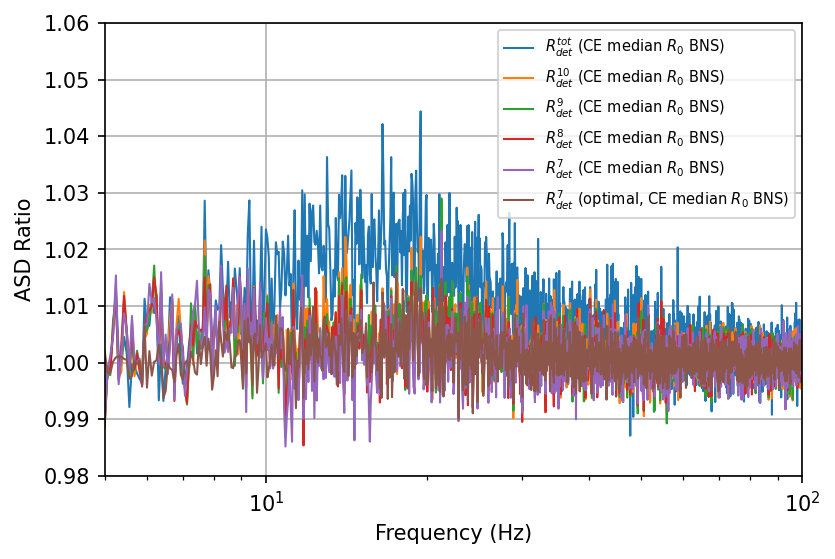

In [9]:
ratio_nosubtraction_CE_median_guassian = np.sqrt(mean_psd_nosubtraction_CE_median) / np.sqrt(mean_psd_CE_det)
ratio_snr10p0_CE_median_guassian = np.sqrt(mean_psd_snr10p0_CE_median) / np.sqrt(mean_psd_CE_det)
ratio_snr9p0_CE_median_guassian = np.sqrt(mean_psd_snr9p0_CE_median) / np.sqrt(mean_psd_CE_det)
ratio_snr8p0_CE_median_guassian = np.sqrt(mean_psd_snr8p0_CE_median) / np.sqrt(mean_psd_CE_det)
ratio_snr7p0_CE_median_guassian = np.sqrt(mean_psd_snr7p0_CE_median) / np.sqrt(mean_psd_CE_det)
ratio_snr7p0_optimal_CE_median_guassian = np.sqrt(mean_psd_CE_bns_median_snr7p0_optimal) / np.sqrt(mean_psd_CE_det)

plt.figure(dpi=150)
plt.semilogx(psd_CE_det[0], ratio_nosubtraction_CE_median_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr10p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{10}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr9p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{9}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr8p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{8}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, CE median $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.06)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

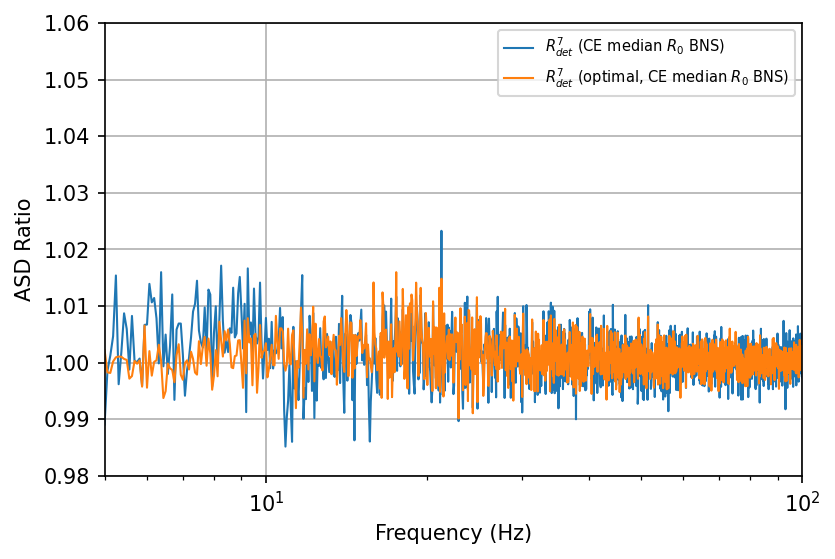

In [20]:
plt.figure(dpi=150)

plt.semilogx(psd_CE_det[0], ratio_snr7p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE median $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, CE median $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.06)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

In [10]:
# load nosubtraction_CE_upper_psd_file
psd_nosubtraction_CE_upper = pd.read_csv('psd_nosubtraction_CE_upper_512s_16s_5h.csv')
psd_nosubtraction_CE_upper = np.array(psd_nosubtraction_CE_upper).T
mean_psd_nosubtraction_CE_upper = np.mean(psd_nosubtraction_CE_upper[1:], axis=0)
print(mean_psd_nosubtraction_CE_upper)

# load psd_list_snr10p0
psd_snr10p0_CE_upper = pd.read_csv('psd_snr10p0_CE_upper_512s_16s_5h.csv')
psd_snr10p0_CE_upper = np.array(psd_snr10p0_CE_upper).T
mean_psd_snr10p0_CE_upper = np.mean(psd_snr10p0_CE_upper[1:], axis=0)
print(mean_psd_snr10p0_CE_upper)

# load psd_list_snr9p0
psd_snr9p0_CE_upper = pd.read_csv('psd_snr9p0_CE_upper_512s_16s_5h.csv')
psd_snr9p0_CE_upper = np.array(psd_snr9p0_CE_upper).T
mean_psd_snr9p0_CE_upper = np.mean(psd_snr9p0_CE_upper[1:], axis=0)
print(mean_psd_snr9p0_CE_upper)

# load psd_list_snr8p0
psd_snr8p0_CE_upper = pd.read_csv('psd_snr8p0_CE_upper_512s_16s_5h.csv')
psd_snr8p0_CE_upper = np.array(psd_snr8p0_CE_upper).T
mean_psd_snr8p0_CE_upper = np.mean(psd_snr8p0_CE_upper[1:], axis=0)
print(mean_psd_snr8p0_CE_upper)

# load psd_list_snr7p0
psd_snr7p0_CE_upper = pd.read_csv('psd_snr7p0_CE_upper_512s_16s_5h.csv')
psd_snr7p0_CE_upper = np.array(psd_snr7p0_CE_upper).T
mean_psd_snr7p0_CE_upper = np.mean(psd_snr7p0_CE_upper[1:], axis=0)
print(mean_psd_snr7p0_CE_upper)

[2.81764387e-59 5.68369000e-59 5.75836539e-59 ... 5.10616467e-49
 4.95952961e-49 1.47944229e-49]
[2.84441457e-59 5.76618658e-59 5.81972053e-59 ... 5.10666350e-49
 4.95904694e-49 1.48054934e-49]
[2.82632199e-59 5.67867749e-59 5.78073593e-59 ... 5.10658238e-49
 4.95877621e-49 1.48075902e-49]
[2.80938423e-59 5.67579868e-59 5.71235581e-59 ... 5.10648511e-49
 4.95836838e-49 1.48077830e-49]
[2.82578260e-59 5.72299034e-59 5.74565931e-59 ... 5.10684006e-49
 4.95827459e-49 1.48056707e-49]


In [11]:
# load bns
psd_CE_bns_upper_snr7p0_optimal = pd.read_csv('psd_snr7p0_optimal_CE_upper_512s_16s_5h.csv')
psd_CE_bns_upper_snr7p0_optimal = np.array(psd_CE_bns_upper_snr7p0_optimal).T

mean_psd_CE_bns_upper_snr7p0_optimal = np.mean(psd_CE_bns_upper_snr7p0_optimal[1:], axis=0)

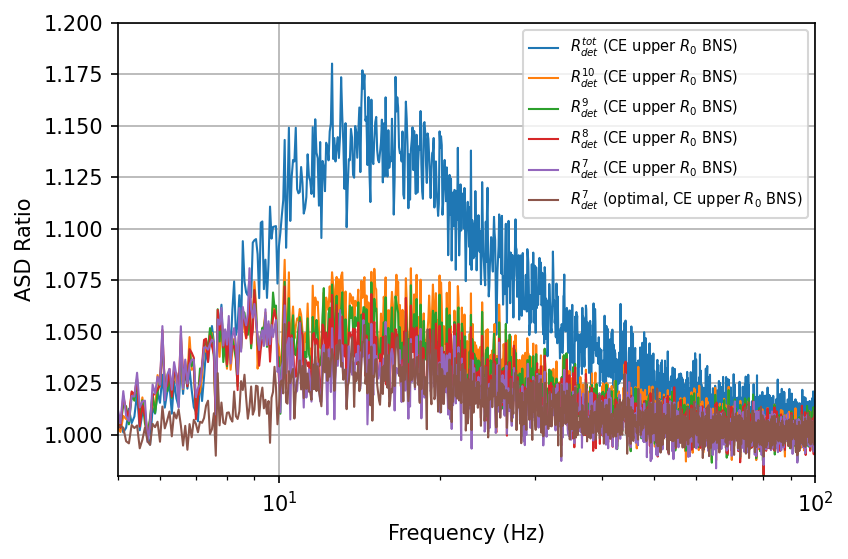

In [12]:
ratio_nosubtraction_CE_upper_guassian = np.sqrt(mean_psd_nosubtraction_CE_upper) / np.sqrt(mean_psd_CE_det)
ratio_snr10p0_CE_upper_guassian = np.sqrt(mean_psd_snr10p0_CE_upper) / np.sqrt(mean_psd_CE_det)
ratio_snr9p0_CE_upper_guassian = np.sqrt(mean_psd_snr9p0_CE_upper) / np.sqrt(mean_psd_CE_det)
ratio_snr8p0_CE_upper_guassian = np.sqrt(mean_psd_snr8p0_CE_upper) / np.sqrt(mean_psd_CE_det)
ratio_snr7p0_CE_upper_guassian = np.sqrt(mean_psd_snr7p0_CE_upper) / np.sqrt(mean_psd_CE_det)
ratio_snr7p0_optimal_CE_upper_guassian = np.sqrt(mean_psd_CE_bns_upper_snr7p0_optimal) / np.sqrt(mean_psd_CE_det)

plt.figure(dpi=150)
plt.semilogx(psd_CE_det[0], ratio_nosubtraction_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr10p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{10}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr9p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{9}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr8p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{8}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, CE upper $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.2)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

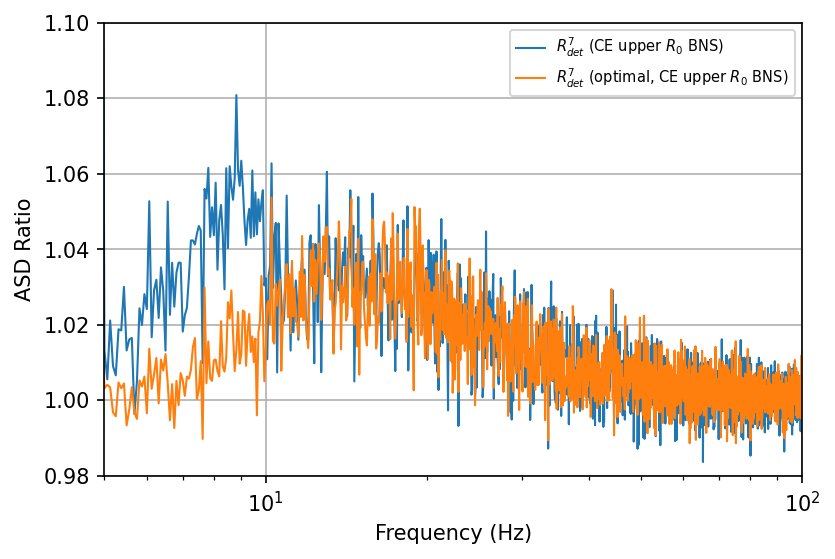

In [12]:
plt.figure(dpi=150)

plt.semilogx(psd_CE_det[0], ratio_snr7p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE upper $R_{0}$ BNS)")
plt.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, CE upper $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.1)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

### 3. Real subtraction results of ET-D.

In [4]:
# median local merger rate

path_subtraction_ETD_medianR0_snr10p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_medianR0_snr10p0/residual_noise_21600s.gwf"
path_subtraction_ETD_medianR0_snr9p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_medianR0_snr9p0/residual_noise_21600s.gwf"
path_subtraction_ETD_medianR0_snr8p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_medianR0_snr8p0/residual_noise_21600s.gwf"
path_subtraction_ETD_medianR0_snr7p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_medianR0_snr7p0/residual_noise_21600s.gwf"
path_confusion_noise = "/mnt/d/project_data/psd_3g/data/ET-D/bns_median_ETD_norotation_6h/confusion_noise_ET-D_1_BNS_21600s.gwf"
path_det_ETD_noise = "/mnt/d/project_data/psd_3g/data/ET-D/ETD_6h/det_noise_ET-D_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_nosubtraction = []
psd_list_snr10p0 = []
psd_list_snr9p0 = []
psd_list_snr8p0 = []
psd_list_snr7p0 = []

for i in tqdm(range(int((21600-3600)/stride))):
    medianR0_snr10p0 = frame.read_frame(location=path_subtraction_ETD_medianR0_snr10p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr9p0 = frame.read_frame(location=path_subtraction_ETD_medianR0_snr9p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr8p0 = frame.read_frame(location=path_subtraction_ETD_medianR0_snr8p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    medianR0_snr7p0 = frame.read_frame(location=path_subtraction_ETD_medianR0_snr7p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    confusion_noise = frame.read_frame(location=path_confusion_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_ETD_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Before subtraction.
    total_noise = det_noise.data + confusion_noise.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise = TimeSeries(total_noise, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    # rho=10
    total_noise_snr10p0 = det_noise.data + medianR0_snr10p0.data
    total_noise_snr10p0 = TimeSeries(total_noise_snr10p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=9
    total_noise_snr9p0 = det_noise.data + medianR0_snr9p0.data
    total_noise_snr9p0 = TimeSeries(total_noise_snr9p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=8
    total_noise_snr8p0 = det_noise.data + medianR0_snr8p0.data
    total_noise_snr8p0 = TimeSeries(total_noise_snr8p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=7
    total_noise_snr7p0 = det_noise.data + medianR0_snr7p0.data
    total_noise_snr7p0 = TimeSeries(total_noise_snr7p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr10p0 = welch(total_noise_snr10p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr9p0 = welch(total_noise_snr9p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr8p0 = welch(total_noise_snr8p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr7p0 = welch(total_noise_snr7p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise = welch(total_noise.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)

    psd_list_nosubtraction.append(estimated_psd_total_noise.data)
    psd_list_snr10p0.append(estimated_psd_total_noise_snr10p0.data)
    psd_list_snr9p0.append(estimated_psd_total_noise_snr9p0.data)
    psd_list_snr8p0.append(estimated_psd_total_noise_snr8p0.data)
    psd_list_snr7p0.append(estimated_psd_total_noise_snr7p0.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_nosubtraction = np.array(psd_list_nosubtraction)
psd_list_snr10p0 = np.array(psd_list_snr10p0)
psd_list_snr9p0 = np.array(psd_list_snr9p0)
psd_list_snr8p0 = np.array(psd_list_snr8p0)
psd_list_snr7p0 = np.array(psd_list_snr7p0)

save psd_list_nosubtraction
print(psd_list_nosubtraction)
print(np.shape(psd_list_nosubtraction))

name_keys = {'frequency': np.array(estimated_psd_total_noise.sample_frequencies).T}
for i in range(len(psd_list_nosubtraction)):
    name_keys['psd_%s' % i] = psd_list_nosubtraction[i]
nosubtraction_ETD_median_psd_file = pd.DataFrame(name_keys)
nosubtraction_ETD_median_psd_file.to_csv("./psd_nosubtraction_ETD_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr10p0
print(psd_list_snr10p0)
print(np.shape(psd_list_snr10p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr10p0.sample_frequencies).T}
for i in range(len(psd_list_snr10p0)):
    name_keys['psd_%s' % i] = psd_list_snr10p0[i]
snr10p0_ETD_median_psd_file = pd.DataFrame(name_keys)
snr10p0_ETD_median_psd_file.to_csv("./psd_snr10p0_ETD_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr9p0
print(psd_list_snr9p0)
print(np.shape(psd_list_snr9p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr9p0.sample_frequencies).T}
for i in range(len(psd_list_snr9p0)):
    name_keys['psd_%s' % i] = psd_list_snr9p0[i]
snr9p0_ETD_median_psd_file = pd.DataFrame(name_keys)
snr9p0_ETD_median_psd_file.to_csv("./psd_snr9p0_ETD_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr8p0
print(psd_list_snr8p0)
print(np.shape(psd_list_snr8p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr8p0.sample_frequencies).T}
for i in range(len(psd_list_snr8p0)):
    name_keys['psd_%s' % i] = psd_list_snr8p0[i]
snr8p0_ETD_median_psd_file = pd.DataFrame(name_keys)
snr8p0_ETD_median_psd_file.to_csv("./psd_snr8p0_ETD_median_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr7p0
print(psd_list_snr7p0)
print(np.shape(psd_list_snr7p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0.sample_frequencies).T}
for i in range(len(psd_list_snr7p0)):
    name_keys['psd_%s' % i] = psd_list_snr7p0[i]
snr7p0_ETD_median_psd_file = pd.DataFrame(name_keys)
snr7p0_ETD_median_psd_file.to_csv("./psd_snr7p0_ETD_median_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:09:58<02:03, 123.49s/it]


[[4.95214983e-55 1.03808491e-54 1.15730687e-54 ... 8.19345332e-49
  9.53498449e-49 1.88188246e-49]
 [7.40998912e-55 1.55140316e-54 1.68425899e-54 ... 1.39753292e-48
  1.35116788e-48 4.03101223e-49]
 [6.62156396e-55 1.35709371e-54 1.45783182e-54 ... 1.24001445e-48
  1.60415014e-48 3.13313564e-49]
 ...
 [6.58611042e-55 1.35378269e-54 1.47833030e-54 ... 1.60140285e-48
  1.26432561e-48 2.41130879e-49]
 [3.14132933e-55 6.65317146e-55 8.16132012e-55 ... 1.25067553e-48
  1.17735214e-48 5.29938255e-49]
 [4.63958840e-55 9.38200636e-55 1.01094562e-54 ... 1.45984646e-48
  1.48643790e-48 4.32033520e-49]]
(35, 32769)


In [13]:
# load det
psd_ETD_det = pd.read_csv('psd_ETD_det_512s_16s_5h.csv')
psd_ETD_det = np.array(psd_ETD_det).T
mean_psd_ETD_det = np.mean(psd_ETD_det[1:], axis=0)
print(mean_psd_ETD_det)

# load nosubtraction_ETD_median_psd_file
psd_nosubtraction_ETD_median = pd.read_csv('psd_nosubtraction_ETD_median_512s_16s_5h.csv')
psd_nosubtraction_ETD_median = np.array(psd_nosubtraction_ETD_median).T
mean_psd_nosubtraction_ETD_median = np.mean(psd_nosubtraction_ETD_median[1:], axis=0)
print(mean_psd_nosubtraction_ETD_median)

# load psd_list_snr10p0
psd_snr10p0_ETD_median = pd.read_csv('psd_snr10p0_ETD_median_512s_16s_5h.csv')
psd_snr10p0_ETD_median = np.array(psd_snr10p0_ETD_median).T
mean_psd_snr10p0_ETD_median = np.mean(psd_snr10p0_ETD_median[1:], axis=0)
print(mean_psd_snr10p0_ETD_median)

# load psd_list_snr9p0
psd_snr9p0_ETD_median = pd.read_csv('psd_snr9p0_ETD_median_512s_16s_5h.csv')
psd_snr9p0_ETD_median = np.array(psd_snr9p0_ETD_median).T
mean_psd_snr9p0_ETD_median = np.mean(psd_snr9p0_ETD_median[1:], axis=0)
print(mean_psd_snr9p0_ETD_median)

# load psd_list_snr8p0
psd_snr8p0_ETD_median = pd.read_csv('psd_snr8p0_ETD_median_512s_16s_5h.csv')
psd_snr8p0_ETD_median = np.array(psd_snr8p0_ETD_median).T
mean_psd_snr8p0_ETD_median = np.mean(psd_snr8p0_ETD_median[1:], axis=0)
print(mean_psd_snr8p0_ETD_median)

# load psd_list_snr7p0
psd_snr7p0_ETD_median = pd.read_csv('psd_snr7p0_ETD_median_512s_16s_5h.csv')
psd_snr7p0_ETD_median = np.array(psd_snr7p0_ETD_median).T
mean_psd_snr7p0_ETD_median = np.mean(psd_snr7p0_ETD_median[1:], axis=0)
print(mean_psd_snr7p0_ETD_median)

[6.42370388e-55 1.32040372e-54 1.45520665e-54 ... 1.31289180e-48
 1.27466003e-48 3.79991271e-49]
[6.42487231e-55 1.32075021e-54 1.45584537e-54 ... 1.31295274e-48
 1.27470332e-48 3.79935856e-49]
[6.42613498e-55 1.32086076e-54 1.45571290e-54 ... 1.31295274e-48
 1.27470332e-48 3.79935895e-49]
[6.42618578e-55 1.32087099e-54 1.45571163e-54 ... 1.31295274e-48
 1.27470332e-48 3.79935895e-49]
[6.42762759e-55 1.32112334e-54 1.45591323e-54 ... 1.31295274e-48
 1.27470332e-48 3.79935895e-49]
[6.44326066e-55 1.32529323e-54 1.45274868e-54 ... 1.31295267e-48
 1.27470330e-48 3.79935871e-49]


In [14]:
# load bns
psd_ETD_bns_median_snr7p0_optimal = pd.read_csv('psd_snr7p0_optimal_ETD_median_512s_16s_5h.csv')
psd_ETD_bns_median_snr7p0_optimal = np.array(psd_ETD_bns_median_snr7p0_optimal).T

mean_psd_ETD_bns_median_snr7p0_optimal = np.mean(psd_ETD_bns_median_snr7p0_optimal[1:], axis=0)

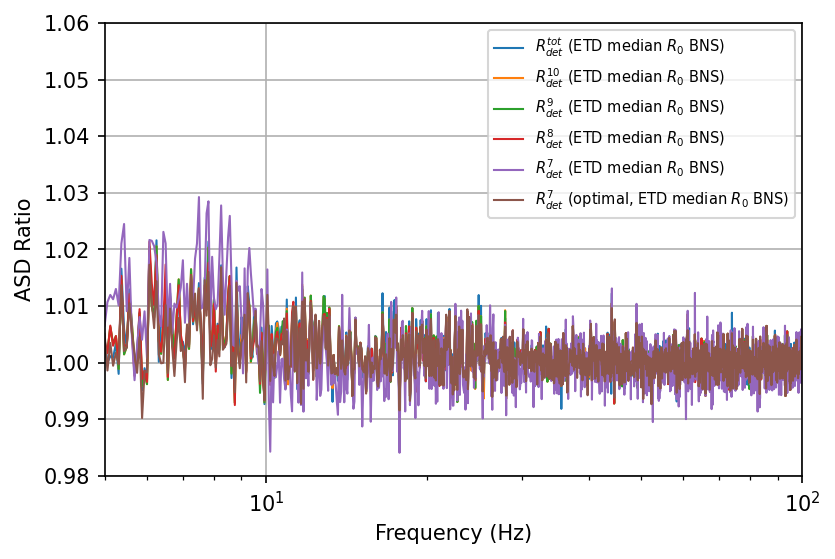

In [15]:
ratio_nosubtraction_ETD_median_guassian = np.sqrt(mean_psd_nosubtraction_ETD_median) / np.sqrt(mean_psd_ETD_det)
ratio_snr10p0_ETD_median_guassian = np.sqrt(mean_psd_snr10p0_ETD_median) / np.sqrt(mean_psd_ETD_det)
ratio_snr9p0_ETD_median_guassian = np.sqrt(mean_psd_snr9p0_ETD_median) / np.sqrt(mean_psd_ETD_det)
ratio_snr8p0_ETD_median_guassian = np.sqrt(mean_psd_snr8p0_ETD_median) / np.sqrt(mean_psd_ETD_det)
ratio_snr7p0_ETD_median_guassian = np.sqrt(mean_psd_snr7p0_ETD_median) / np.sqrt(mean_psd_ETD_det)
ratio_snr7p0_optimal_ETD_median_guassian = np.sqrt(mean_psd_ETD_bns_median_snr7p0_optimal) / np.sqrt(mean_psd_ETD_det)

plt.figure(dpi=150)
plt.semilogx(psd_ETD_det[0], ratio_nosubtraction_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (ETD median $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr10p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{10}$ (ETD median $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr9p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{9}$ (ETD median $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr8p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{8}$ (ETD median $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr7p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (ETD median $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr7p0_optimal_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, ETD median $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.06)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

In [10]:
# upper local merger rate

path_subtraction_ETD_upperR0_snr10p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_upperR0_snr10p0/residual_noise_21600s.gwf"
path_subtraction_ETD_upperR0_snr9p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_upperR0_snr9p0/residual_noise_21600s.gwf"
path_subtraction_ETD_upperR0_snr8p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_upperR0_snr8p0/residual_noise_21600s.gwf"
path_subtraction_ETD_upperR0_snr7p0 = "/mnt/e/project_data/psd_3g/subtraction/subtraction_ETD_upperR0_snr7p0/residual_noise_21600s.gwf"
path_confusion_noise = "/mnt/d/project_data/psd_3g/data/ET-D/bns_upper_ETD_norotation_6h/confusion_noise_ET-D_1_BNS_21600s.gwf"
path_det_ETD_noise = "/mnt/d/project_data/psd_3g/data/ET-D/ETD_6h/det_noise_ET-D_21600s.gwf"

start_time = 3600
stride = 512
psd_stride = 16
end_time = start_time + stride
psd_list_nosubtraction = []
psd_list_snr10p0 = []
psd_list_snr9p0 = []
psd_list_snr8p0 = []
psd_list_snr7p0 = []

for i in tqdm(range(int((21600-3600)/stride))):
    upperR0_snr10p0 = frame.read_frame(location=path_subtraction_ETD_upperR0_snr10p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr9p0 = frame.read_frame(location=path_subtraction_ETD_upperR0_snr9p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr8p0 = frame.read_frame(location=path_subtraction_ETD_upperR0_snr8p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    upperR0_snr7p0 = frame.read_frame(location=path_subtraction_ETD_upperR0_snr7p0, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    confusion_noise = frame.read_frame(location=path_confusion_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)
    det_noise = frame.read_frame(location=path_det_ETD_noise, channels='H1:LDAS-STRAIN', start_time=start_time, end_time=end_time)

    # Before subtraction.
    total_noise = det_noise.data + confusion_noise.data
    epoch = lal.LIGOTimeGPS(det_noise.start_time)
    total_noise = TimeSeries(total_noise, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    # rho=10
    total_noise_snr10p0 = det_noise.data + upperR0_snr10p0.data
    total_noise_snr10p0 = TimeSeries(total_noise_snr10p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=9
    total_noise_snr9p0 = det_noise.data + upperR0_snr9p0.data
    total_noise_snr9p0 = TimeSeries(total_noise_snr9p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=8
    total_noise_snr8p0 = det_noise.data + upperR0_snr8p0.data
    total_noise_snr8p0 = TimeSeries(total_noise_snr8p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)
    # rho=7
    total_noise_snr7p0 = det_noise.data + upperR0_snr7p0.data
    total_noise_snr7p0 = TimeSeries(total_noise_snr7p0, delta_t=1.0/det_noise.sample_rate, epoch=epoch)

    delta_t = 1.0/det_noise.sample_rate
    seg_len = int(psd_stride/delta_t)
    seg_stride = int(seg_len/2)
    estimated_psd_total_noise_snr10p0 = welch(total_noise_snr10p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr9p0 = welch(total_noise_snr9p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr8p0 = welch(total_noise_snr8p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise_snr7p0 = welch(total_noise_snr7p0.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)
    estimated_psd_total_noise = welch(total_noise.time_slice(start_time, end_time), seg_len=seg_len, seg_stride=seg_stride)

    psd_list_nosubtraction.append(estimated_psd_total_noise.data)
    psd_list_snr10p0.append(estimated_psd_total_noise_snr10p0.data)
    psd_list_snr9p0.append(estimated_psd_total_noise_snr9p0.data)
    psd_list_snr8p0.append(estimated_psd_total_noise_snr8p0.data)
    psd_list_snr7p0.append(estimated_psd_total_noise_snr7p0.data)

    start_time += stride
    end_time += stride
    if end_time > 21600:
        break

psd_list_nosubtraction = np.array(psd_list_nosubtraction)
psd_list_snr10p0 = np.array(psd_list_snr10p0)
psd_list_snr9p0 = np.array(psd_list_snr9p0)
psd_list_snr8p0 = np.array(psd_list_snr8p0)
psd_list_snr7p0 = np.array(psd_list_snr7p0)

# save psd_list_nosubtraction
print(psd_list_nosubtraction)
print(np.shape(psd_list_nosubtraction))

name_keys = {'frequency': np.array(estimated_psd_total_noise.sample_frequencies).T}
for i in range(len(psd_list_nosubtraction)):
    name_keys['psd_%s' % i] = psd_list_nosubtraction[i]
nosubtraction_ETD_upper_psd_file = pd.DataFrame(name_keys)
nosubtraction_ETD_upper_psd_file.to_csv("./psd_nosubtraction_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr10p0
print(psd_list_snr10p0)
print(np.shape(psd_list_snr10p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr10p0.sample_frequencies).T}
for i in range(len(psd_list_snr10p0)):
    name_keys['psd_%s' % i] = psd_list_snr10p0[i]
snr10p0_ETD_upper_psd_file = pd.DataFrame(name_keys)
snr10p0_ETD_upper_psd_file.to_csv("./psd_snr10p0_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr9p0
print(psd_list_snr9p0)
print(np.shape(psd_list_snr9p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr9p0.sample_frequencies).T}
for i in range(len(psd_list_snr9p0)):
    name_keys['psd_%s' % i] = psd_list_snr9p0[i]
snr9p0_ETD_upper_psd_file = pd.DataFrame(name_keys)
snr9p0_ETD_upper_psd_file.to_csv("./psd_snr9p0_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr8p0
print(psd_list_snr8p0)
print(np.shape(psd_list_snr8p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr8p0.sample_frequencies).T}
for i in range(len(psd_list_snr8p0)):
    name_keys['psd_%s' % i] = psd_list_snr8p0[i]
snr8p0_ETD_upper_psd_file = pd.DataFrame(name_keys)
snr8p0_ETD_upper_psd_file.to_csv("./psd_snr8p0_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

# save psd_list_snr7p0
print(psd_list_snr7p0)
print(np.shape(psd_list_snr7p0))

name_keys = {'frequency': np.array(estimated_psd_total_noise_snr7p0.sample_frequencies).T}
for i in range(len(psd_list_snr7p0)):
    name_keys['psd_%s' % i] = psd_list_snr7p0[i]
snr7p0_ETD_upper_psd_file = pd.DataFrame(name_keys)
snr7p0_ETD_upper_psd_file.to_csv("./psd_snr7p0_ETD_upper_512s_16s_5h.csv", index=False, sep=',')

 97%|█████████▋| 34/35 [1:08:39<02:01, 121.17s/it]


[[4.75035167e-55 9.88184302e-55 1.08605463e-54 ... 8.19340268e-49
  9.52655715e-49 1.88450804e-49]
 [7.64100128e-55 1.59771161e-54 1.70360035e-54 ... 1.39834719e-48
  1.35221266e-48 4.02658951e-49]
 [6.79293915e-55 1.39185761e-54 1.49286848e-54 ... 1.24124776e-48
  1.60355429e-48 3.13352212e-49]
 ...
 [6.58829674e-55 1.35745580e-54 1.48240892e-54 ... 1.60336660e-48
  1.26453122e-48 2.41152404e-49]
 [3.14821464e-55 6.62277241e-55 8.17758426e-55 ... 1.25125295e-48
  1.17743353e-48 5.30348565e-49]
 [4.77907470e-55 9.12084854e-55 1.01139244e-54 ... 1.46047571e-48
  1.48617277e-48 4.31737319e-49]]
(35, 32769)


In [16]:
# load det
psd_ETD_det = pd.read_csv('psd_ETD_det_512s_16s_5h.csv')
psd_ETD_det = np.array(psd_ETD_det).T
mean_psd_ETD_det = np.mean(psd_ETD_det[1:], axis=0)
print(mean_psd_ETD_det)

# load nosubtraction_ETD_upper_psd_file
psd_nosubtraction_ETD_upper = pd.read_csv('psd_nosubtraction_ETD_upper_512s_16s_5h.csv')
psd_nosubtraction_ETD_upper = np.array(psd_nosubtraction_ETD_upper).T
mean_psd_nosubtraction_ETD_upper = np.mean(psd_nosubtraction_ETD_upper[1:], axis=0)
print(mean_psd_nosubtraction_ETD_upper)

# load psd_list_snr10p0
psd_snr10p0_ETD_upper = pd.read_csv('psd_snr10p0_ETD_upper_512s_16s_5h.csv')
psd_snr10p0_ETD_upper = np.array(psd_snr10p0_ETD_upper).T
mean_psd_snr10p0_ETD_upper = np.mean(psd_snr10p0_ETD_upper[1:], axis=0)
print(mean_psd_snr10p0_ETD_upper)

# load psd_list_snr9p0
psd_snr9p0_ETD_upper = pd.read_csv('psd_snr9p0_ETD_upper_512s_16s_5h.csv')
psd_snr9p0_ETD_upper = np.array(psd_snr9p0_ETD_upper).T
mean_psd_snr9p0_ETD_upper = np.mean(psd_snr9p0_ETD_upper[1:], axis=0)
print(mean_psd_snr9p0_ETD_upper)

# load psd_list_snr8p0
psd_snr8p0_ETD_upper = pd.read_csv('psd_snr8p0_ETD_upper_512s_16s_5h.csv')
psd_snr8p0_ETD_upper = np.array(psd_snr8p0_ETD_upper).T
mean_psd_snr8p0_ETD_upper = np.mean(psd_snr8p0_ETD_upper[1:], axis=0)
print(mean_psd_snr8p0_ETD_upper)

# load psd_list_snr7p0
psd_snr7p0_ETD_upper = pd.read_csv('psd_snr7p0_ETD_upper_512s_16s_5h.csv')
psd_snr7p0_ETD_upper = np.array(psd_snr7p0_ETD_upper).T
mean_psd_snr7p0_ETD_upper = np.mean(psd_snr7p0_ETD_upper[1:], axis=0)
print(mean_psd_snr7p0_ETD_upper)

[6.42370388e-55 1.32040372e-54 1.45520665e-54 ... 1.31289180e-48
 1.27466003e-48 3.79991271e-49]
[6.42794599e-55 1.32118368e-54 1.45502393e-54 ... 1.31314757e-48
 1.27457566e-48 3.79918423e-49]
[6.43619743e-55 1.32144105e-54 1.45462390e-54 ... 1.31314757e-48
 1.27457566e-48 3.79918396e-49]
[6.43719747e-55 1.32096999e-54 1.45418514e-54 ... 1.31314757e-48
 1.27457566e-48 3.79918396e-49]
[6.43114577e-55 1.32078051e-54 1.45375155e-54 ... 1.31314757e-48
 1.27457566e-48 3.79918423e-49]
[6.44853485e-55 1.32457708e-54 1.45312813e-54 ... 1.31314757e-48
 1.27457565e-48 3.79918383e-49]


In [17]:
# load bns
psd_ETD_bns_upper_snr7p0_optimal = pd.read_csv('psd_snr7p0_optimal_ETD_upper_512s_16s_5h.csv')
psd_ETD_bns_upper_snr7p0_optimal = np.array(psd_ETD_bns_upper_snr7p0_optimal).T

mean_psd_ETD_bns_upper_snr7p0_optimal = np.mean(psd_ETD_bns_upper_snr7p0_optimal[1:], axis=0)

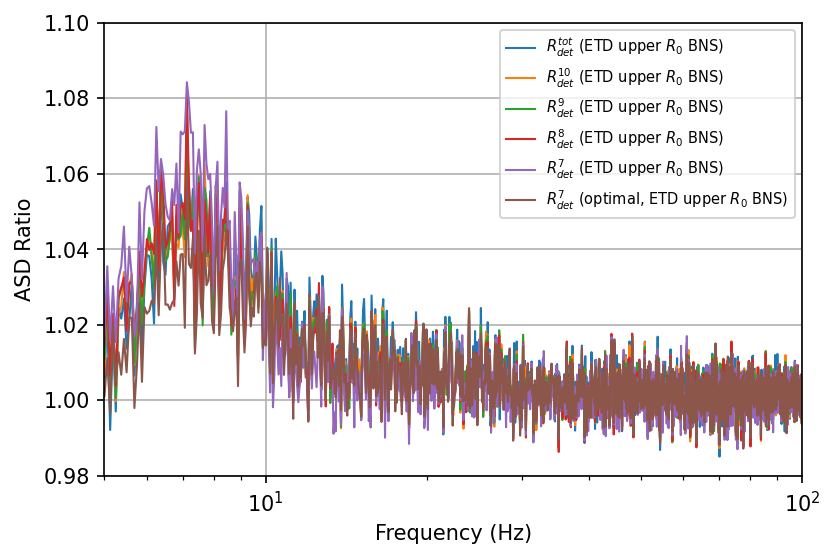

In [18]:
ratio_nosubtraction_ETD_upper_guassian = np.sqrt(mean_psd_nosubtraction_ETD_upper) / np.sqrt(mean_psd_ETD_det)
ratio_snr10p0_ETD_upper_guassian = np.sqrt(mean_psd_snr10p0_ETD_upper) / np.sqrt(mean_psd_ETD_det)
ratio_snr9p0_ETD_upper_guassian = np.sqrt(mean_psd_snr9p0_ETD_upper) / np.sqrt(mean_psd_ETD_det)
ratio_snr8p0_ETD_upper_guassian = np.sqrt(mean_psd_snr8p0_ETD_upper) / np.sqrt(mean_psd_ETD_det)
ratio_snr7p0_ETD_upper_guassian = np.sqrt(mean_psd_snr7p0_ETD_upper) / np.sqrt(mean_psd_ETD_det)
ratio_snr7p0_optimal_ETD_upper_guassian = np.sqrt(mean_psd_ETD_bns_upper_snr7p0_optimal) / np.sqrt(mean_psd_ETD_det)

plt.figure(dpi=150)
plt.semilogx(psd_ETD_det[0], ratio_nosubtraction_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (ETD upper $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr10p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{10}$ (ETD upper $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr9p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{9}$ (ETD upper $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr8p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{8}$ (ETD upper $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr7p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (ETD upper $R_{0}$ BNS)")
plt.semilogx(psd_ETD_det[0], ratio_snr7p0_optimal_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (optimal, ETD upper $R_{0}$ BNS)")

plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD Ratio")
plt.xlim(5, 100)
plt.ylim(0.98, 1.1)
plt.legend(loc='upper right', fontsize=7)
plt.grid()
plt.show()

### 4. Plot together.

/tmp/ipykernel_2521/1666028548.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


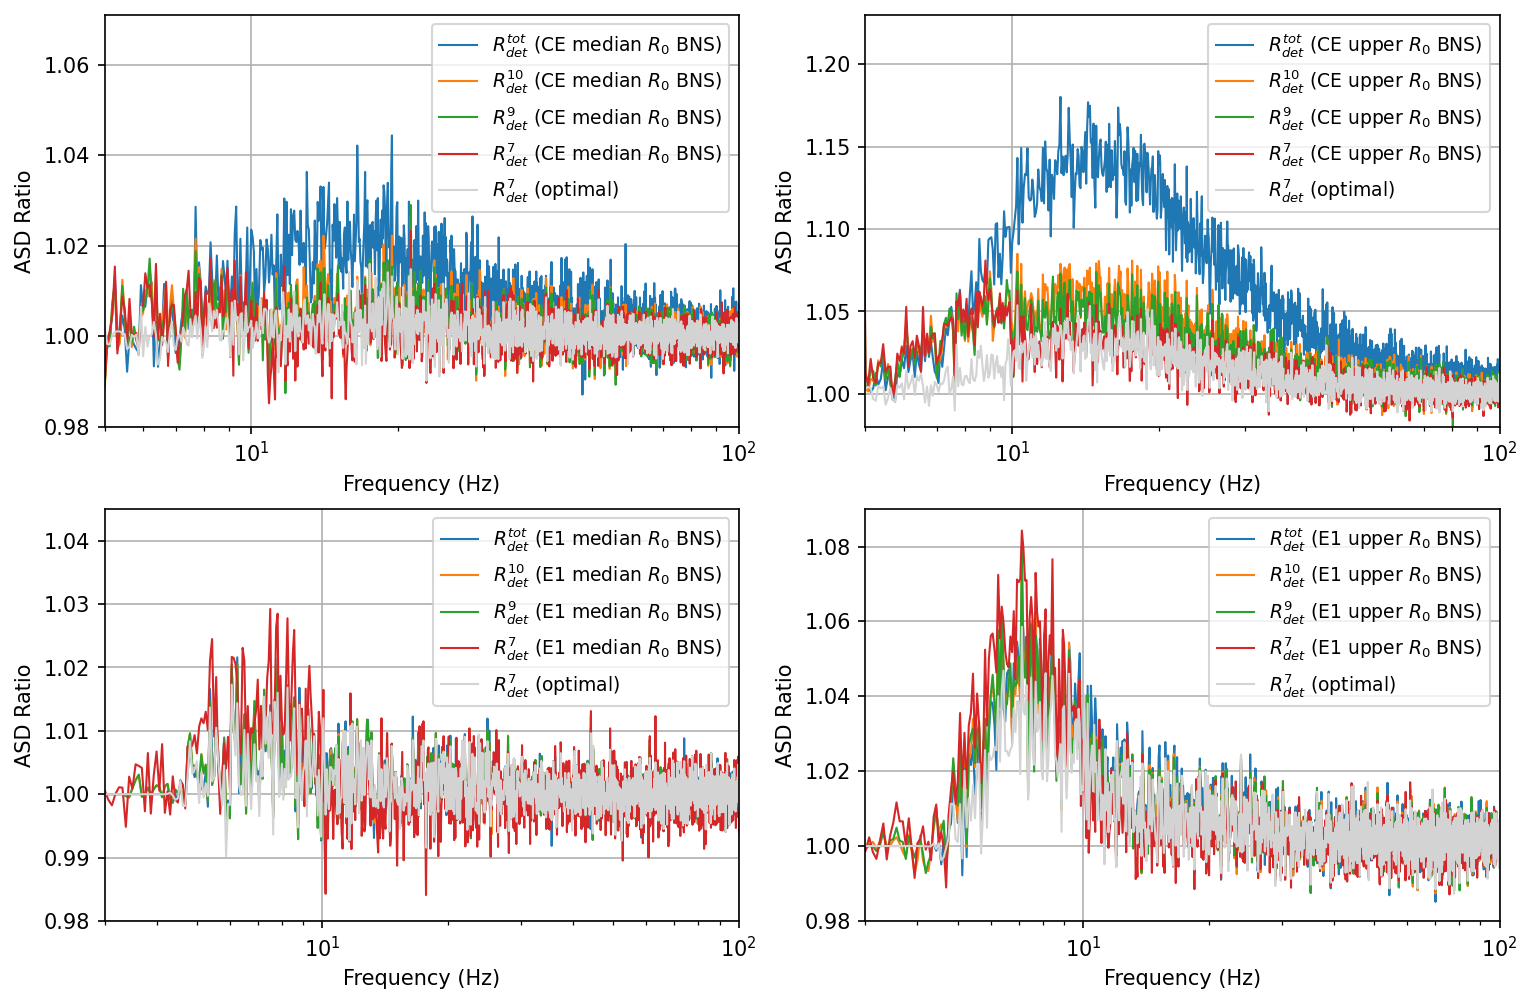

In [39]:
f = plt.figure(figsize=(12,8), dpi=150)
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.semilogx(psd_CE_det[0], ratio_nosubtraction_CE_median_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (CE median $R_{0}$ BNS)")
ax1.semilogx(psd_CE_det[0], ratio_snr10p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{10}$ (CE median $R_{0}$ BNS)")
ax1.semilogx(psd_CE_det[0], ratio_snr9p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{9}$ (CE median $R_{0}$ BNS)")
# ax1.semilogx(psd_CE_det[0], ratio_snr8p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{8}$ (CE median $R_{0}$ BNS)")
ax1.semilogx(psd_CE_det[0], ratio_snr7p0_CE_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE median $R_{0}$ BNS)")
ax1.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_median_guassian, color='lightgray', linewidth=1, label=r"$R_{det}^{7}$ (optimal)")

ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("ASD Ratio")
ax1.set_xlim(5, 100)
ax1.set_ylim(0.98, 1.071)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid()


ax2.semilogx(psd_CE_det[0], ratio_nosubtraction_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (CE upper $R_{0}$ BNS)")
ax2.semilogx(psd_CE_det[0], ratio_snr10p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{10}$ (CE upper $R_{0}$ BNS)")
ax2.semilogx(psd_CE_det[0], ratio_snr9p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{9}$ (CE upper $R_{0}$ BNS)")
# ax2.semilogx(psd_CE_det[0], ratio_snr8p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{8}$ (CE upper $R_{0}$ BNS)")
ax2.semilogx(psd_CE_det[0], ratio_snr7p0_CE_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (CE upper $R_{0}$ BNS)")
ax2.semilogx(psd_CE_det[0], ratio_snr7p0_optimal_CE_upper_guassian, color='lightgray', linewidth=1, label=r"$R_{det}^{7}$ (optimal)")

ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("ASD Ratio")
ax2.set_xlim(5, 100)
ax2.set_ylim(0.98, 1.23)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid()

ax3.semilogx(psd_ETD_det[0], ratio_nosubtraction_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (E1 median $R_{0}$ BNS)")
ax3.semilogx(psd_ETD_det[0], ratio_snr10p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{10}$ (E1 median $R_{0}$ BNS)")
ax3.semilogx(psd_ETD_det[0], ratio_snr9p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{9}$ (E1 median $R_{0}$ BNS)")
# ax3.semilogx(psd_ETD_det[0], ratio_snr8p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{8}$ (E1 median $R_{0}$ BNS)")
ax3.semilogx(psd_ETD_det[0], ratio_snr7p0_ETD_median_guassian, linewidth=1, label=r"$R_{det}^{7}$ (E1 median $R_{0}$ BNS)")
ax3.semilogx(psd_ETD_det[0], ratio_snr7p0_optimal_ETD_median_guassian, color='lightgray', linewidth=1, label=r"$R_{det}^{7}$ (optimal)")

ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("ASD Ratio")
ax3.set_xlim(3, 100)
ax3.set_ylim(0.98, 1.045)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid()

ax4.semilogx(psd_ETD_det[0], ratio_nosubtraction_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{tot}$ (E1 upper $R_{0}$ BNS)")
ax4.semilogx(psd_ETD_det[0], ratio_snr10p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{10}$ (E1 upper $R_{0}$ BNS)")
ax4.semilogx(psd_ETD_det[0], ratio_snr9p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{9}$ (E1 upper $R_{0}$ BNS)")
# ax4.semilogx(psd_ETD_det[0], ratio_snr8p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{8}$ (E1 upper $R_{0}$ BNS)")
ax4.semilogx(psd_ETD_det[0], ratio_snr7p0_ETD_upper_guassian, linewidth=1, label=r"$R_{det}^{7}$ (E1 upper $R_{0}$ BNS)")
ax4.semilogx(psd_ETD_det[0], ratio_snr7p0_optimal_ETD_upper_guassian, color='lightgray', linewidth=1, label=r"$R_{det}^{7}$ (optimal)")

ax4.set_xlabel("Frequency (Hz)")
ax4.set_ylabel("ASD Ratio")
ax4.set_xlim(3, 100)
ax4.set_ylim(0.98, 1.09)
ax4.legend(loc='upper right', fontsize=9)
ax4.grid()

f.savefig('asd_ratio_subtraction.pdf', dpi=500)
f.show()